In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_data.csv')

In [3]:
df.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [6]:
X = df.drop('bought_insurance', axis = 1)
Y = df['bought_insurance']

In [7]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<Axes: >

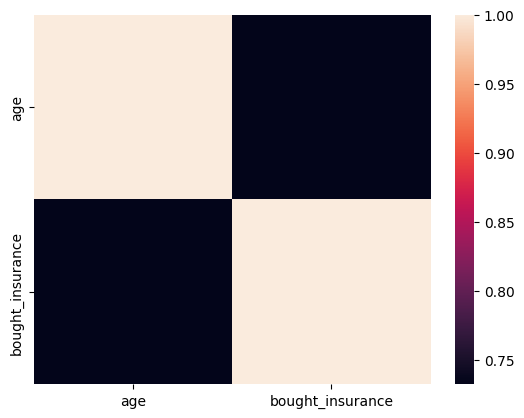

In [8]:
sns.heatmap(df.corr())

In [9]:
#split into test and predict
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X , Y, train_size=0.7, random_state=12345)

In [10]:
x_train.shape

(18, 1)

In [11]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train,y_train)

LogisticRegressionCV()

In [12]:
y_true = y_test
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
#tn fp
#fn tp
tn, fp, fn, tp = cm.ravel()
cm

array([[5, 1],
       [0, 3]], dtype=int64)

## accuracy

In [14]:
accuracy = (tn + tp)/(tn+fp+fn+tp) *100
print(f"accuracy = {accuracy:.2f}%")
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test,y_pred)
print(f"accuracy = {accu * 100:.2f}%")

accuracy = 88.89%
accuracy = 88.89%


## precesion

In [15]:
precesion = (tp)/(tp+fp)*100
print(f"precesion = {precesion:.2f}%")

precesion = 75.00%


In [16]:
from sklearn.metrics import precision_score
pre = precision_score(y_test, y_pred)
pre

0.75

## recall

In [17]:
recall = tp / tp+fn *100
recall

1.0

In [18]:
from sklearn.metrics import recall_score
rec = recall_score(y_test,y_pred)
rec

1.0

## f1 score

In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print (f"f1 score = {f1*100}")

f1 score = 85.71428571428571


In [20]:
age_list = [58,30,20,49,53]
for age in age_list:
    result = model.predict([[age]])
    print(f"the prediction of buying insureance of age {age} is {result}")

the prediction of buying insureance of age 58 is [1]
the prediction of buying insureance of age 30 is [1]
the prediction of buying insureance of age 20 is [0]
the prediction of buying insureance of age 49 is [1]
the prediction of buying insureance of age 53 is [1]


C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature

In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

